In [1]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

font_location = 'C:/Windows/Fonts/malgunsl.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
sns.set(rc = {'figure.figsize':(15,8)})
matplotlib.rc('font' , family=font_name)#한글폰트 설정

In [2]:
# 데이터 불러오기
df = pd.read_excel('자동차항만입출항전처리데이터.xlsx', index_col=0)
df

,선명,호출부호,입항년도,입항횟수,입출,총톤수,계선,계선장소,계선장소.1,작업시간,예선,도선,차항지,전출항지,선사번호
0,TITANIA,9HA2272,2011,1,0,74255,MBJ 02,MBJ,2,116.000000,1,1,목포,장승포,EUKO
1,WESTERN HIGHWAY,3EJK5,2011,1,0,39422,MBJ 02,MBJ,2,107.583333,1,1,SINGAPORE,"KANDA, FUKUOKA",EVOL
2,NORTHERN HIGHWAY,V7FT4,2012,1,1,39422,MBJ 01,MBJ,1,38.000000,1,1,NEW WESTMINSTER,광양,GLVS
3,NORTHERN HIGHWAY,V7FT4,2012,1,0,39422,MBJ 03,MBJ,3,38.000000,1,1,NEW WESTMINSTER,광양,GLVS
4,CAR STAR,A8VI6,2012,1,0,43790,MBJ 03,MBJ,3,7.750000,1,1,YOKOHAMA,"NAGOYA, AICHI",ZIMU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11428,PRESTIGE ACE,H3NG,2021,2,1,55878,MBJ 01,MBJ,1,15.750000,1,1,광양,SINGAPORE,GLVS
11429,PASSAMA,ZDNC6,2021,2,1,47053,MBJ 03,MBJ,3,73.000000,1,1,MOJI/KITAKYUSHU,마산,L53K
11430,아세안 메저스티호,DSMZ8,2021,2,1,71383,MBJ 02,MBJ,2,39.750000,1,1,평택.당진,마산,EUKO
11431,MORNING LILY,3FDI5,2021,2,1,70853,MBJ 03,MBJ,3,15.750000,1,1,마산,평택.당진,EUKO


호출부호: \
선명\
입항횟수: 카테고리\
입출: 0, 1\
총톤수\
입항일시\
출항일시

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11430 entries, 0 to 11432
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   선명      11430 non-null  object 
 1   호출부호    11430 non-null  object 
 2   입항년도    11430 non-null  int64  
 3   입항횟수    11430 non-null  int64  
 4   입출      11430 non-null  int64  
 5   총톤수     11430 non-null  int64  
 6   계선      11430 non-null  object 
 7   계선장소    11430 non-null  object 
 8   계선장소.1  11430 non-null  int64  
 9   작업시간    11430 non-null  float64
 10  예선      11430 non-null  int64  
 11  도선      11430 non-null  int64  
 12  차항지     11430 non-null  object 
 13  전출항지    11430 non-null  object 
 14  선사번호    11430 non-null  object 
dtypes: float64(1), int64(7), object(7)
memory usage: 1.4+ MB


In [4]:
df.isnull().sum()

선명        0
호출부호      0
입항년도      0
입항횟수      0
입출        0
총톤수       0
계선        0
계선장소      0
계선장소.1    0
작업시간      0
예선        0
도선        0
차항지       0
전출항지      0
선사번호      0
dtype: int64

In [5]:
df.describe()

,입항년도,입항횟수,입출,총톤수,계선장소.1,작업시간,예선,도선
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,2015.830884,2.367542,0.500175,55254.122222,1.879003,29.322880,0.981977,0.982327
std,2.794225,1.643079,0.500022,11679.214692,0.777318,33.420165,0.133039,0.131765
min,2011.000000,1.000000,0.000000,4464.000000,1.000000,0.300000,0.000000,0.000000
25%,2013.000000,1.000000,0.000000,47654.000000,1.000000,9.037500,1.000000,1.000000
50%,2015.000000,2.000000,1.000000,58631.000000,2.000000,15.166667,1.000000,1.000000
75%,2018.000000,3.000000,1.000000,60876.000000,2.000000,34.416667,1.000000,1.000000
max,2021.000000,13.000000,1.000000,76420.000000,5.000000,382.500000,1.000000,1.000000


<AxesSubplot:xlabel='count', ylabel='계선'>

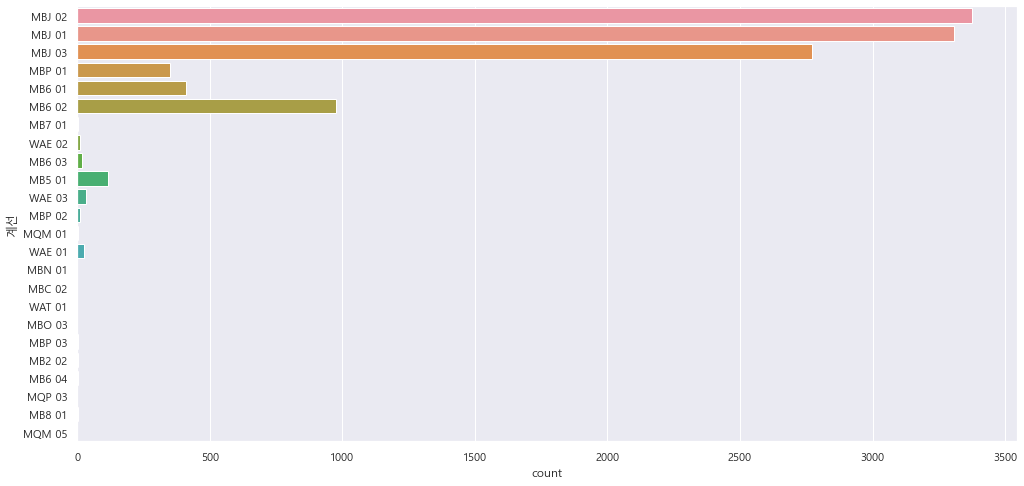

In [8]:
# 계선장소에 너무 쓸데없는 값들이 많이 있다.
sns.countplot(y = df['계선'])

In [9]:
a = pd.DataFrame(df['계선장소'].value_counts())
a

,계선장소
MBJ,9452
MB6,1409
MBP,365
MB5,116
WAE,70
MQM,6
MB8,3
MB7,2
MB2,2
WAT,1


In [10]:
# 총 데이터가 9년반
# 누적 입항횟수가 20 미만 계선장소 행 제거
DelRow = a.query('계선장소 <= 10').index.tolist()
DelRow

# 필요없는 계선장소인 행들의 인덱스 저장 후 drop
loc = []
for i in range(len(df['계선장소'])):
    if df['계선장소'].iloc[i] in DelRow:
        loc.append(i)
df.drop(loc, inplace=True)
df.reset_index(drop=True)

,선명,호출부호,입항년도,입항횟수,입출,총톤수,계선,계선장소,계선장소.1,작업시간,예선,도선,차항지,전출항지,선사번호
0,TITANIA,9HA2272,2011,1,0,74255,MBJ 02,MBJ,2,116.000000,1,1,목포,장승포,EUKO
1,WESTERN HIGHWAY,3EJK5,2011,1,0,39422,MBJ 02,MBJ,2,107.583333,1,1,SINGAPORE,"KANDA, FUKUOKA",EVOL
2,NORTHERN HIGHWAY,V7FT4,2012,1,1,39422,MBJ 01,MBJ,1,38.000000,1,1,NEW WESTMINSTER,광양,GLVS
3,NORTHERN HIGHWAY,V7FT4,2012,1,0,39422,MBJ 03,MBJ,3,38.000000,1,1,NEW WESTMINSTER,광양,GLVS
4,CAR STAR,A8VI6,2012,1,0,43790,MBJ 03,MBJ,3,7.750000,1,1,YOKOHAMA,"NAGOYA, AICHI",ZIMU
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11407,PRESTIGE ACE,H3NG,2021,2,1,55878,MBJ 01,MBJ,1,15.750000,1,1,광양,SINGAPORE,GLVS
11408,PASSAMA,ZDNC6,2021,2,1,47053,MBJ 03,MBJ,3,73.000000,1,1,MOJI/KITAKYUSHU,마산,L53K
11409,아세안 메저스티호,DSMZ8,2021,2,1,71383,MBJ 02,MBJ,2,39.750000,1,1,평택.당진,마산,EUKO
11410,MORNING LILY,3FDI5,2021,2,1,70853,MBJ 03,MBJ,3,15.750000,1,1,마산,평택.당진,EUKO


In [13]:
df.to_excel(excel_writer='자동차항만입출항전처리데이터.xlsx') #엑셀로 저장

# EDA

<AxesSubplot:xlabel='입항년도', ylabel='count'>

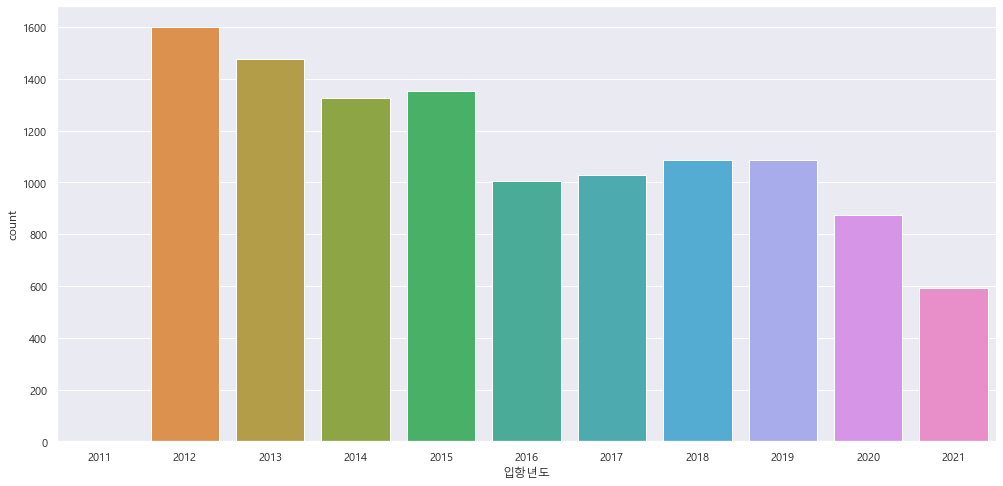

In [6]:
sns.countplot('입항년도', data=df)

<AxesSubplot:xlabel='입항횟수', ylabel='count'>

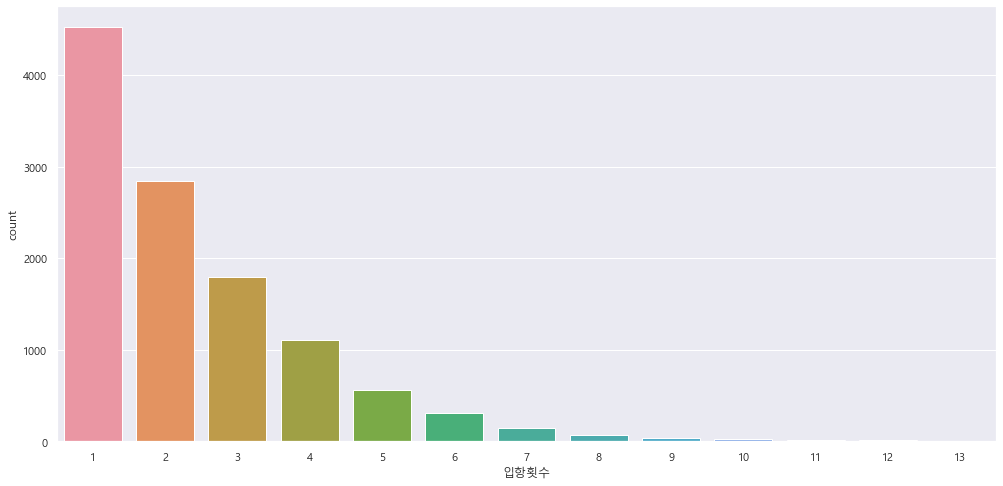

In [7]:
sns.countplot('입항횟수', data=df)

<AxesSubplot:xlabel='계선장소', ylabel='count'>

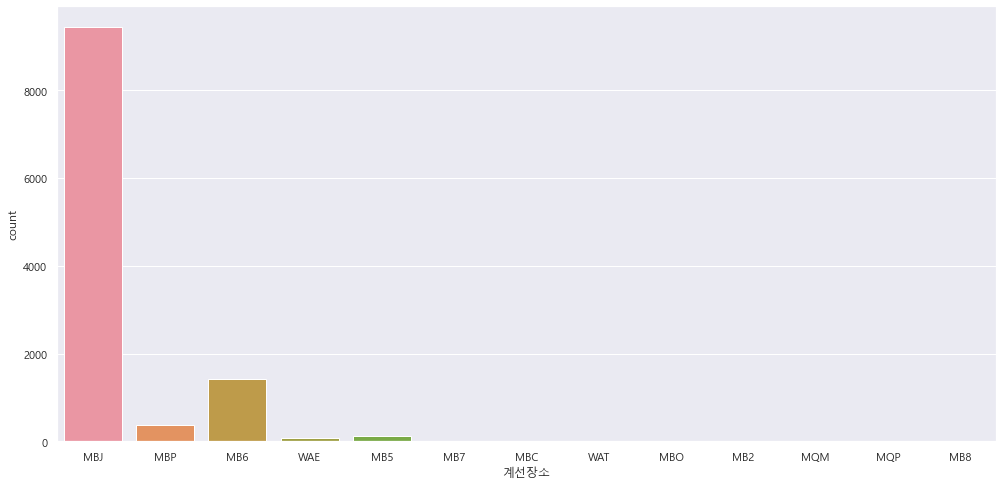

In [11]:
sns.countplot(df['계선장소'])

# 일변량 데이터 분석

In [14]:
df.describe()

,입항년도,입항횟수,입출,총톤수,계선장소.1,작업시간,예선,도선
count,11412.000000,11412.000000,11412.000000,11412.000000,11412.000000,11412.000000,11412.000000,11412.000000
mean,2015.832632,2.367508,0.500175,55257.358920,1.879425,29.278674,0.982036,0.982387
std,2.793954,1.643194,0.500022,11670.358729,0.777053,33.344541,0.132825,0.131546
min,2011.000000,1.000000,0.000000,4464.000000,1.000000,0.300000,0.000000,0.000000
25%,2013.000000,1.000000,0.000000,47654.000000,1.000000,9.029167,1.000000,1.000000
50%,2015.000000,2.000000,1.000000,58631.000000,2.000000,15.166667,1.000000,1.000000
75%,2018.000000,3.000000,1.000000,60876.000000,2.000000,34.387500,1.000000,1.000000
max,2021.000000,13.000000,1.000000,76420.000000,5.000000,382.500000,1.000000,1.000000


(array([ 213.,   14.,   16.,  123.,  352., 2133., 1219., 4893., 1422.,
        1027.]),
 array([ 4464. , 11659.6, 18855.2, 26050.8, 33246.4, 40442. , 47637.6,
        54833.2, 62028.8, 69224.4, 76420. ]),
 <BarContainer object of 10 artists>)

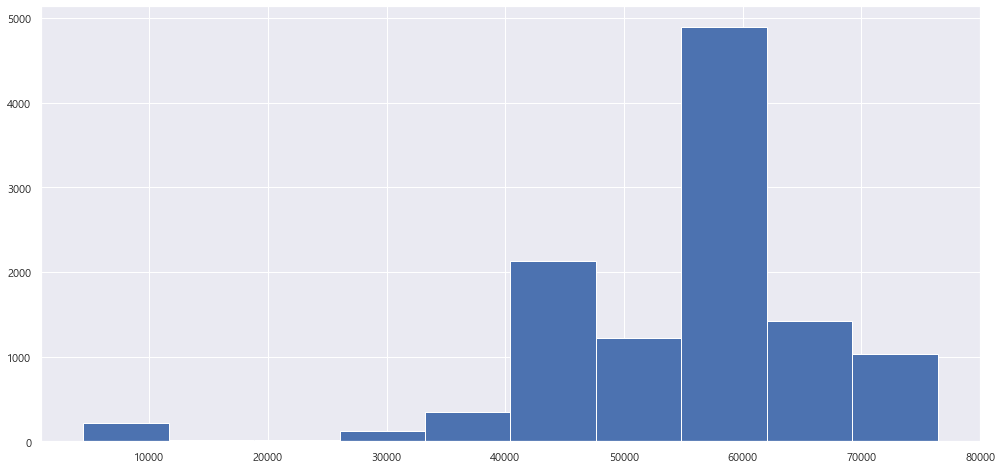

In [15]:
plt.hist(df['총톤수'])
# 만톤인 자동차 운반선은 언제 운항 했던 것인가
# 과거의 자동차 운반선이지 않을까?

(array([9.002e+03, 1.483e+03, 5.460e+02, 2.410e+02, 7.700e+01, 4.300e+01,
        9.000e+00, 7.000e+00, 2.000e+00, 2.000e+00]),
 array([3.0000e-01, 3.8520e+01, 7.6740e+01, 1.1496e+02, 1.5318e+02,
        1.9140e+02, 2.2962e+02, 2.6784e+02, 3.0606e+02, 3.4428e+02,
        3.8250e+02]),
 <BarContainer object of 10 artists>)

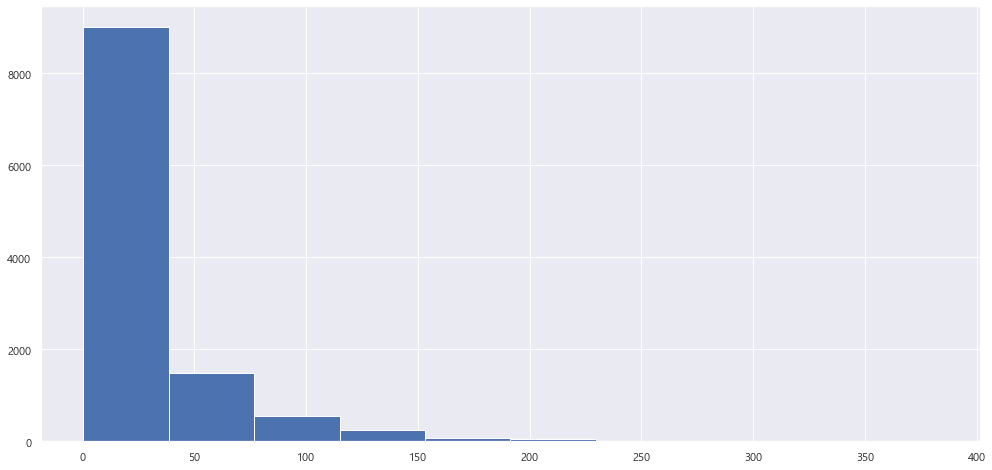

In [16]:
plt.hist(df['작업시간'])

(array([7350., 1797., 1109.,  556.,  305.,  209.,   36.,   22.,   14.,
          14.]),
 array([ 1. ,  2.2,  3.4,  4.6,  5.8,  7. ,  8.2,  9.4, 10.6, 11.8, 13. ]),
 <BarContainer object of 10 artists>)

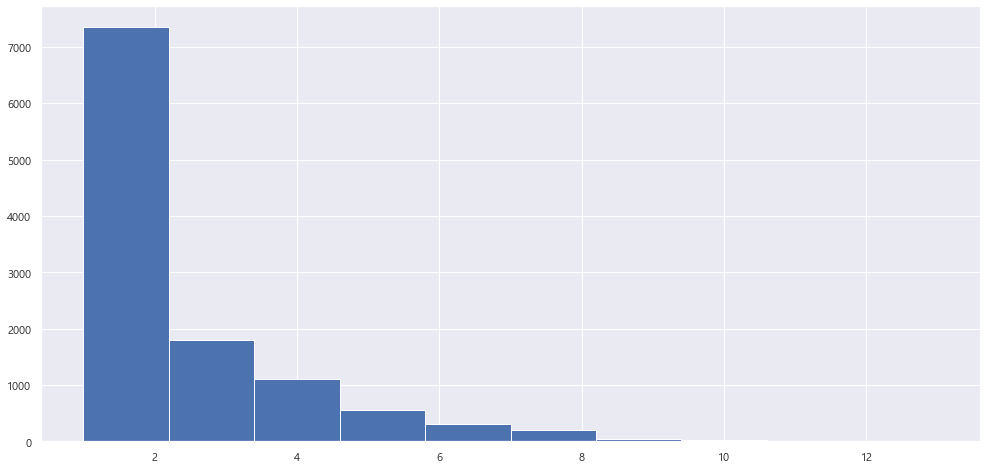

In [17]:
plt.hist(df['입항횟수'])

<AxesSubplot:xlabel='입출', ylabel='count'>

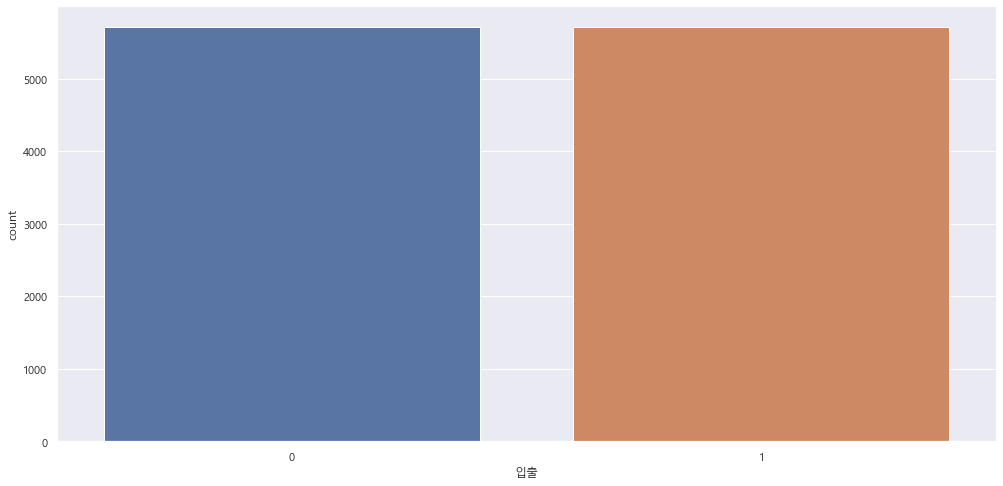

In [18]:
sns.countplot(df['입출'])

<AxesSubplot:xlabel='작업시간'>

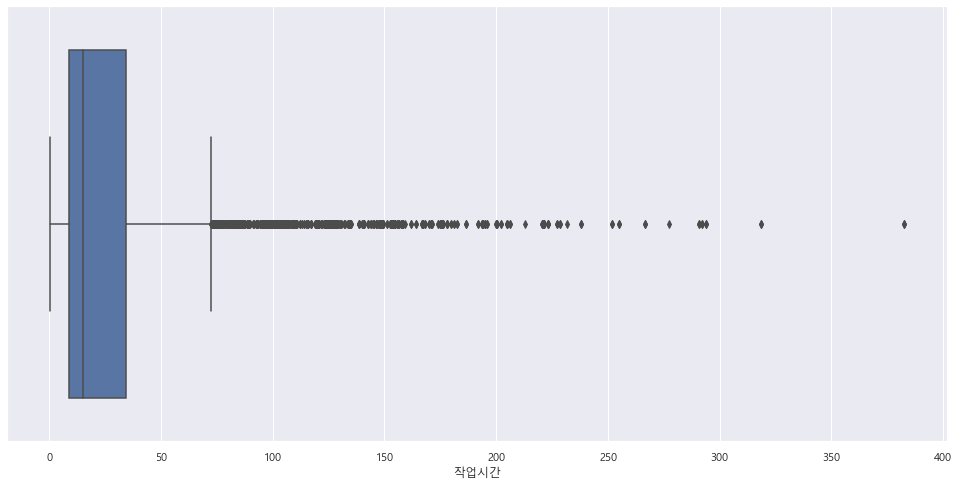

In [19]:
sns.boxplot(data=df, x='작업시간')

<AxesSubplot:xlabel='입항년도'>

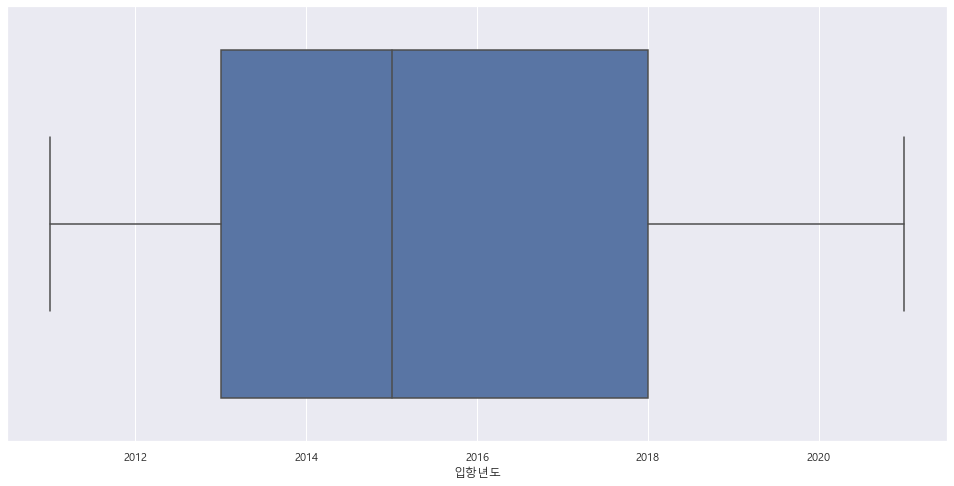

In [20]:
sns.boxplot(data=df, x='입항년도')

<AxesSubplot:xlabel='입항횟수'>

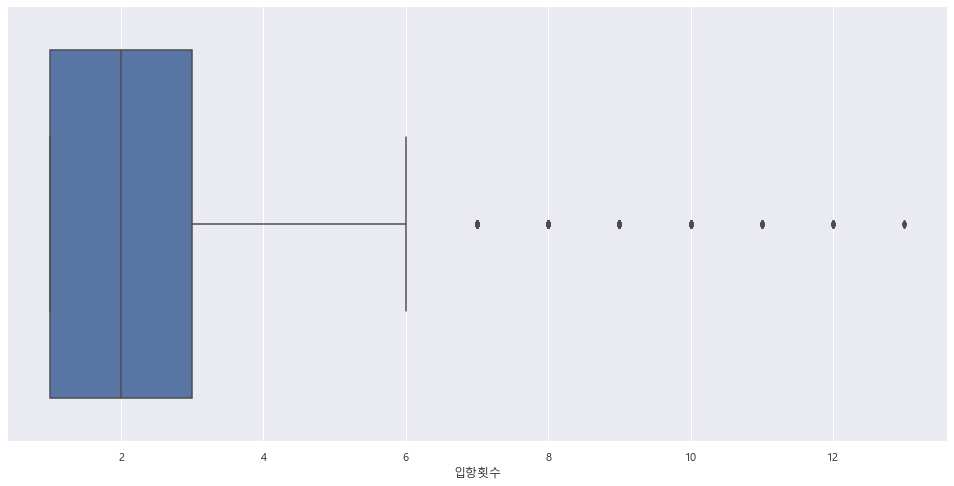

In [21]:
sns.boxplot(data=df, x='입항횟수')

<AxesSubplot:xlabel='총톤수'>

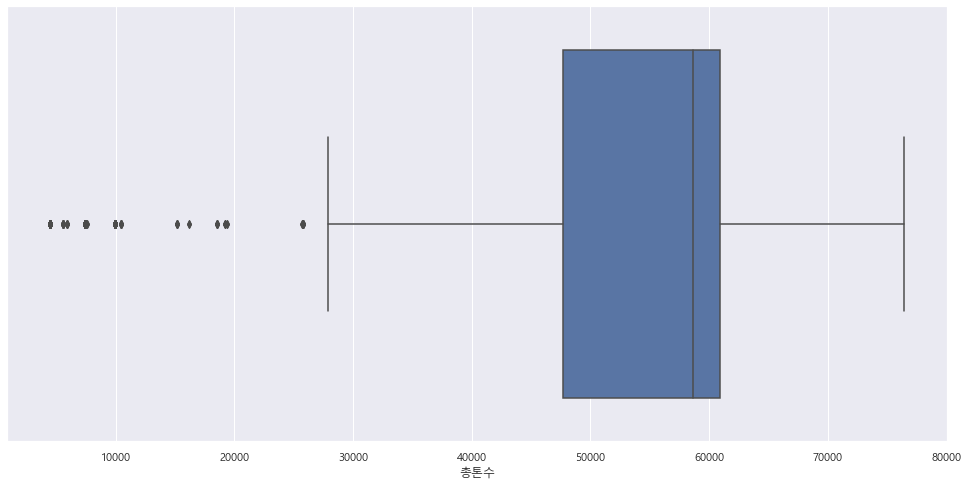

In [22]:
sns.boxplot(df['총톤수'])

<AxesSubplot:xlabel='선사번호', ylabel='count'>

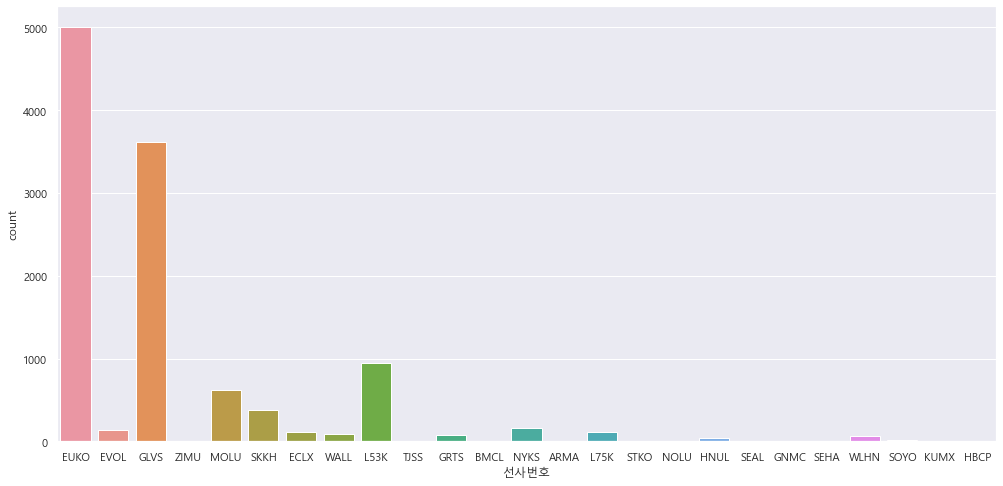

In [23]:
sns.countplot(df['선사번호'])
# 가장 이용이 많은 선사
# EUKO
# GLVS
# L53K
# MOLU
# SKKH

# 이변량 데이터 분석

<AxesSubplot:xlabel='계선장소', ylabel='count'>

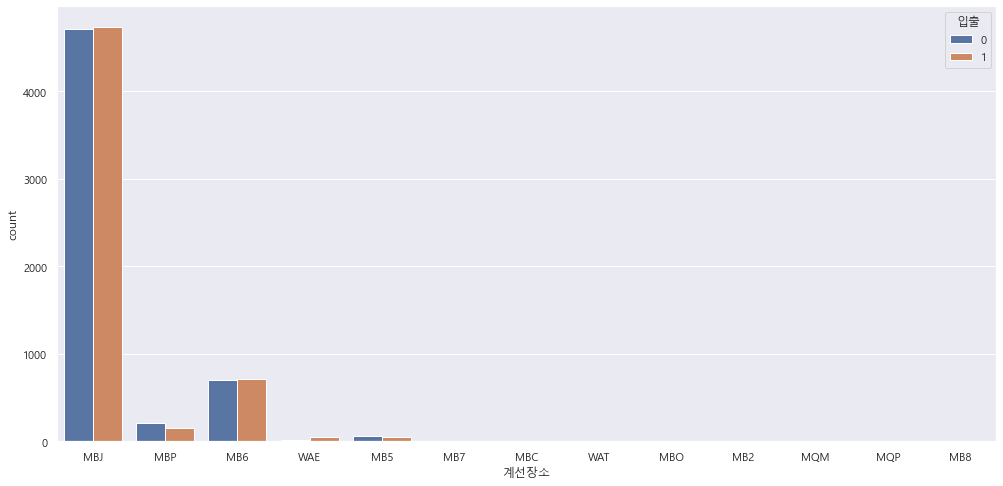

In [24]:
sns.countplot(data=df, x='계선장소', hue='입출')

<AxesSubplot:xlabel='계선장소', ylabel='입출'>

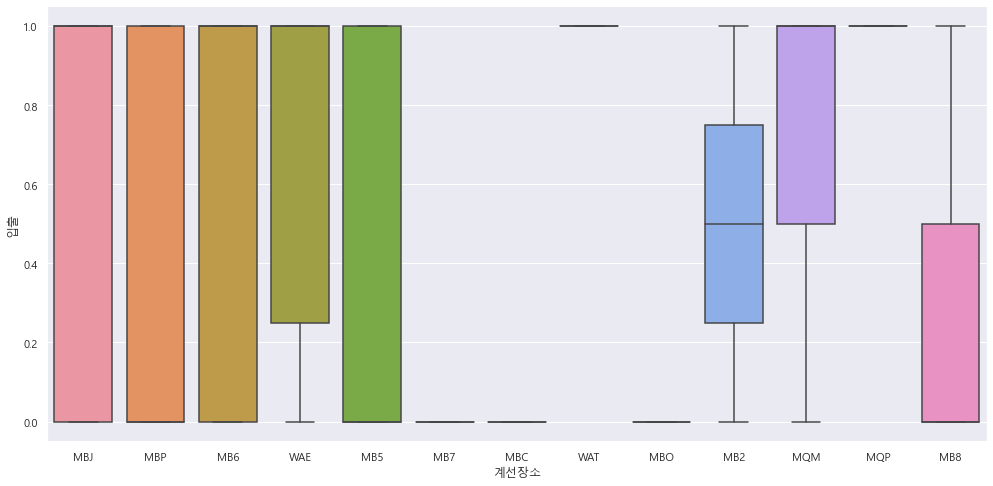

In [25]:
sns.boxplot(data=df, x='계선장소', y='입출')

<AxesSubplot:xlabel='작업시간', ylabel='선사번호'>

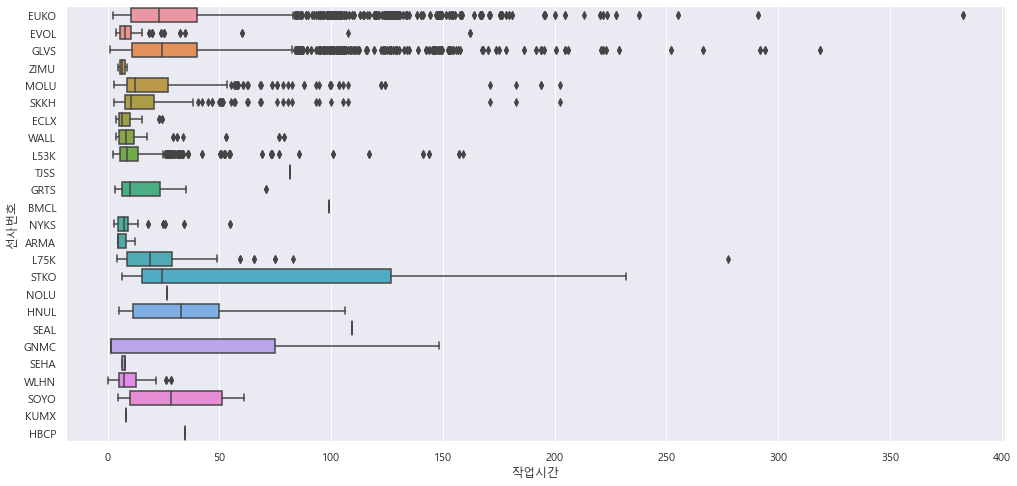

In [26]:
sns.boxplot(data=df, x='작업시간', y='선사번호')

<AxesSubplot:xlabel='작업시간', ylabel='계선장소'>

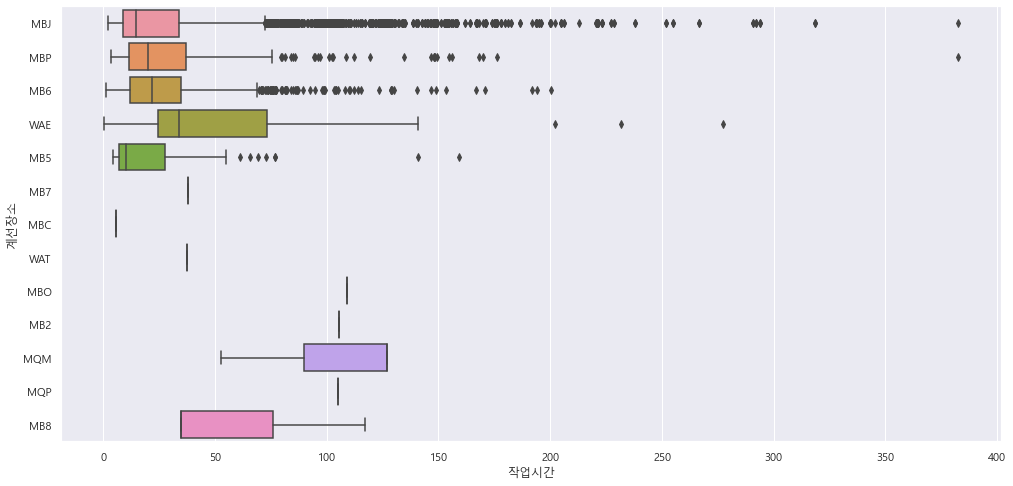

In [27]:
sns.boxplot(data=df, x='작업시간', y='계선장소')

<AxesSubplot:xlabel='총톤수', ylabel='계선장소'>

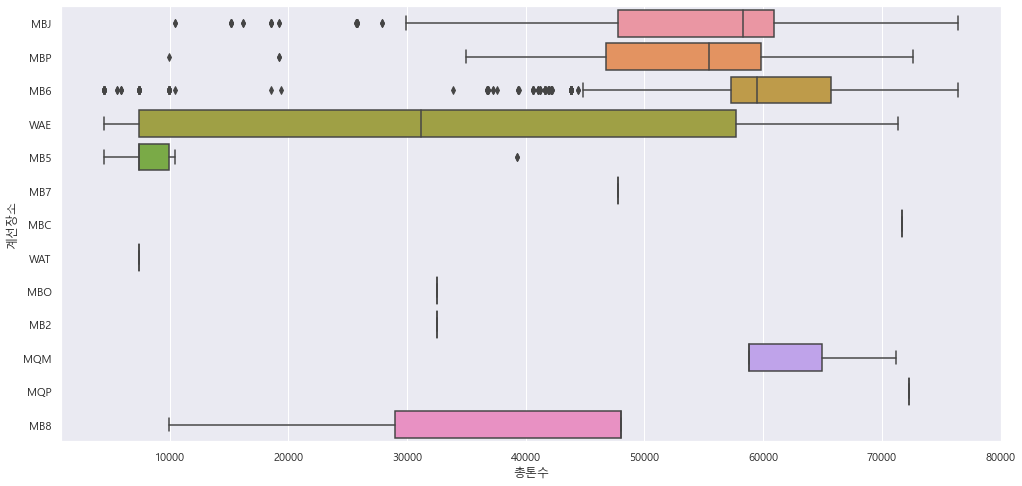

In [28]:
sns.boxplot(data=df, x='총톤수', y='계선장소')

<AxesSubplot:xlabel='총톤수', ylabel='선사번호'>

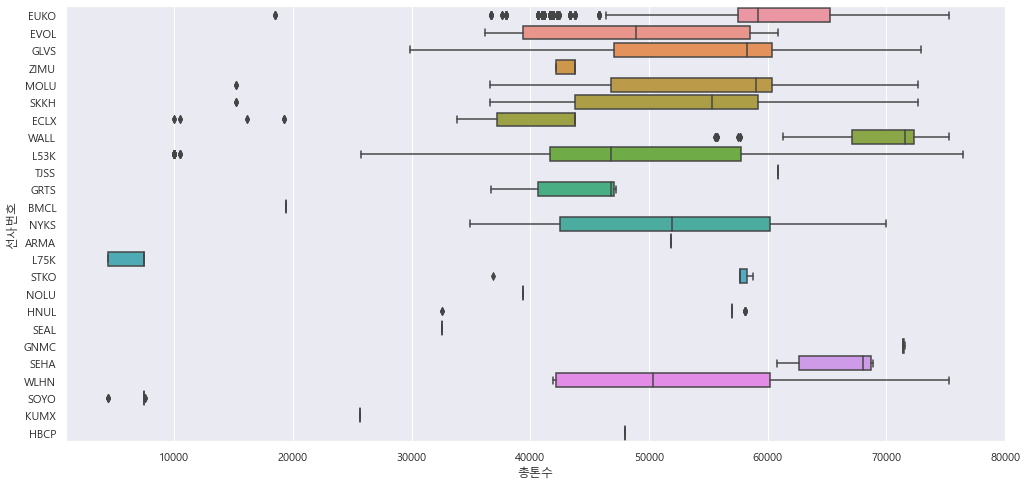

In [29]:
sns.boxplot(data=df, x='총톤수', y='선사번호')

<AxesSubplot:xlabel='총톤수', ylabel='작업시간'>

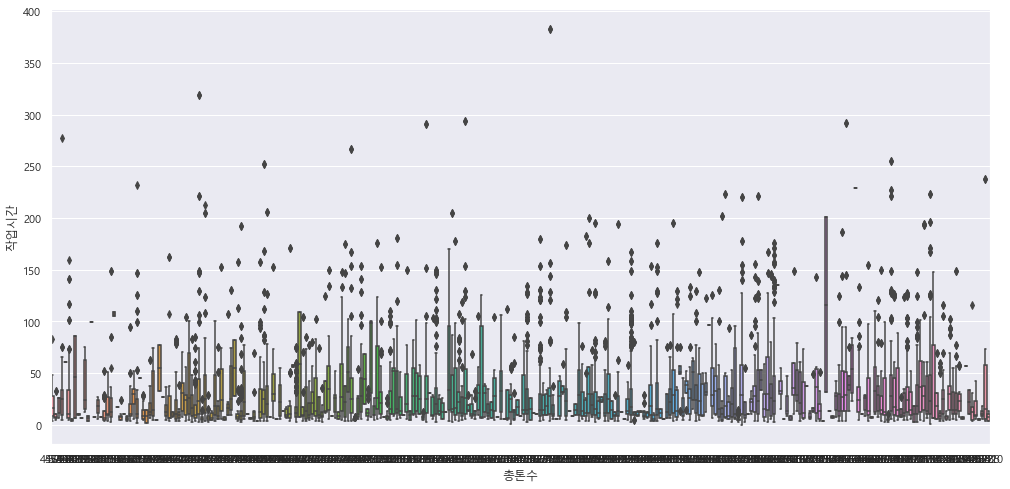

In [30]:
sns.boxplot(data=df, x='총톤수', y='작업시간')

<AxesSubplot:xlabel='입항년도', ylabel='선사번호'>

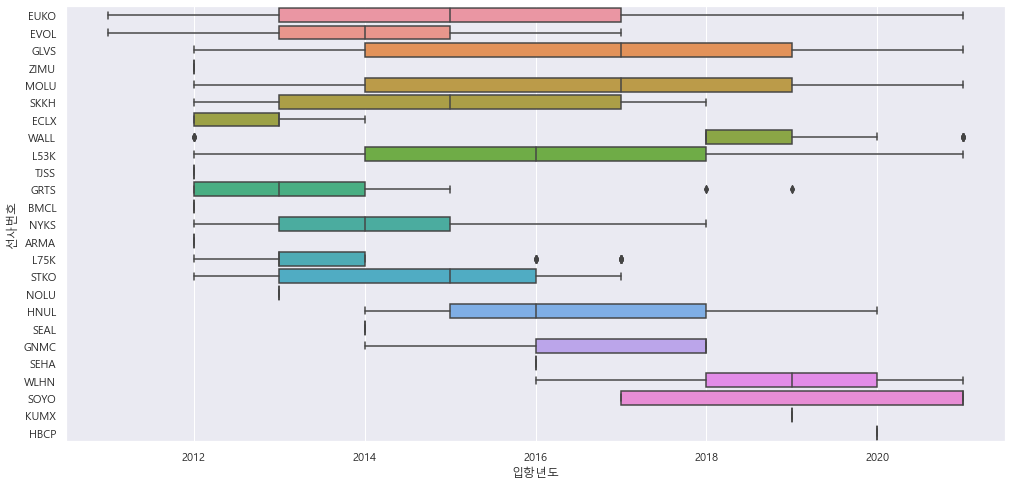

In [31]:
sns.boxplot(data=df, x='입항년도', y='선사번호')

<AxesSubplot:xlabel='입항횟수', ylabel='선사번호'>

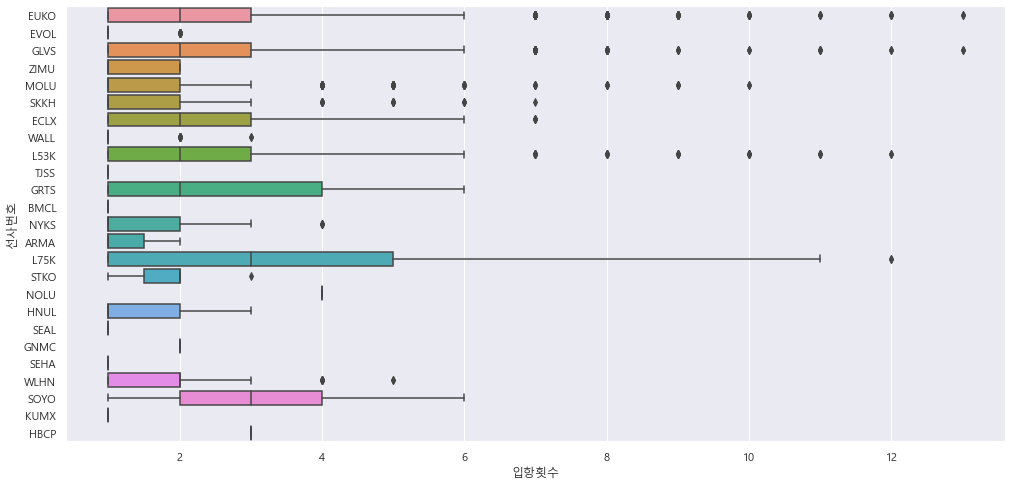

In [32]:
sns.boxplot(data=df, x='입항횟수', y='선사번호')

In [33]:
df.groupby('계선장소')['작업시간'].mean()

계선장소
MB2    105.416667
MB5     21.167672
MB6     27.676626
MB7     38.000000
MB8     62.055556
MBC      5.666667
MBJ     29.276903
MBO    109.166667
MBP     31.657597
MQM    102.027778
MQP    105.183333
WAE     54.072619
WAT     37.666667
Name: 작업시간, dtype: float64

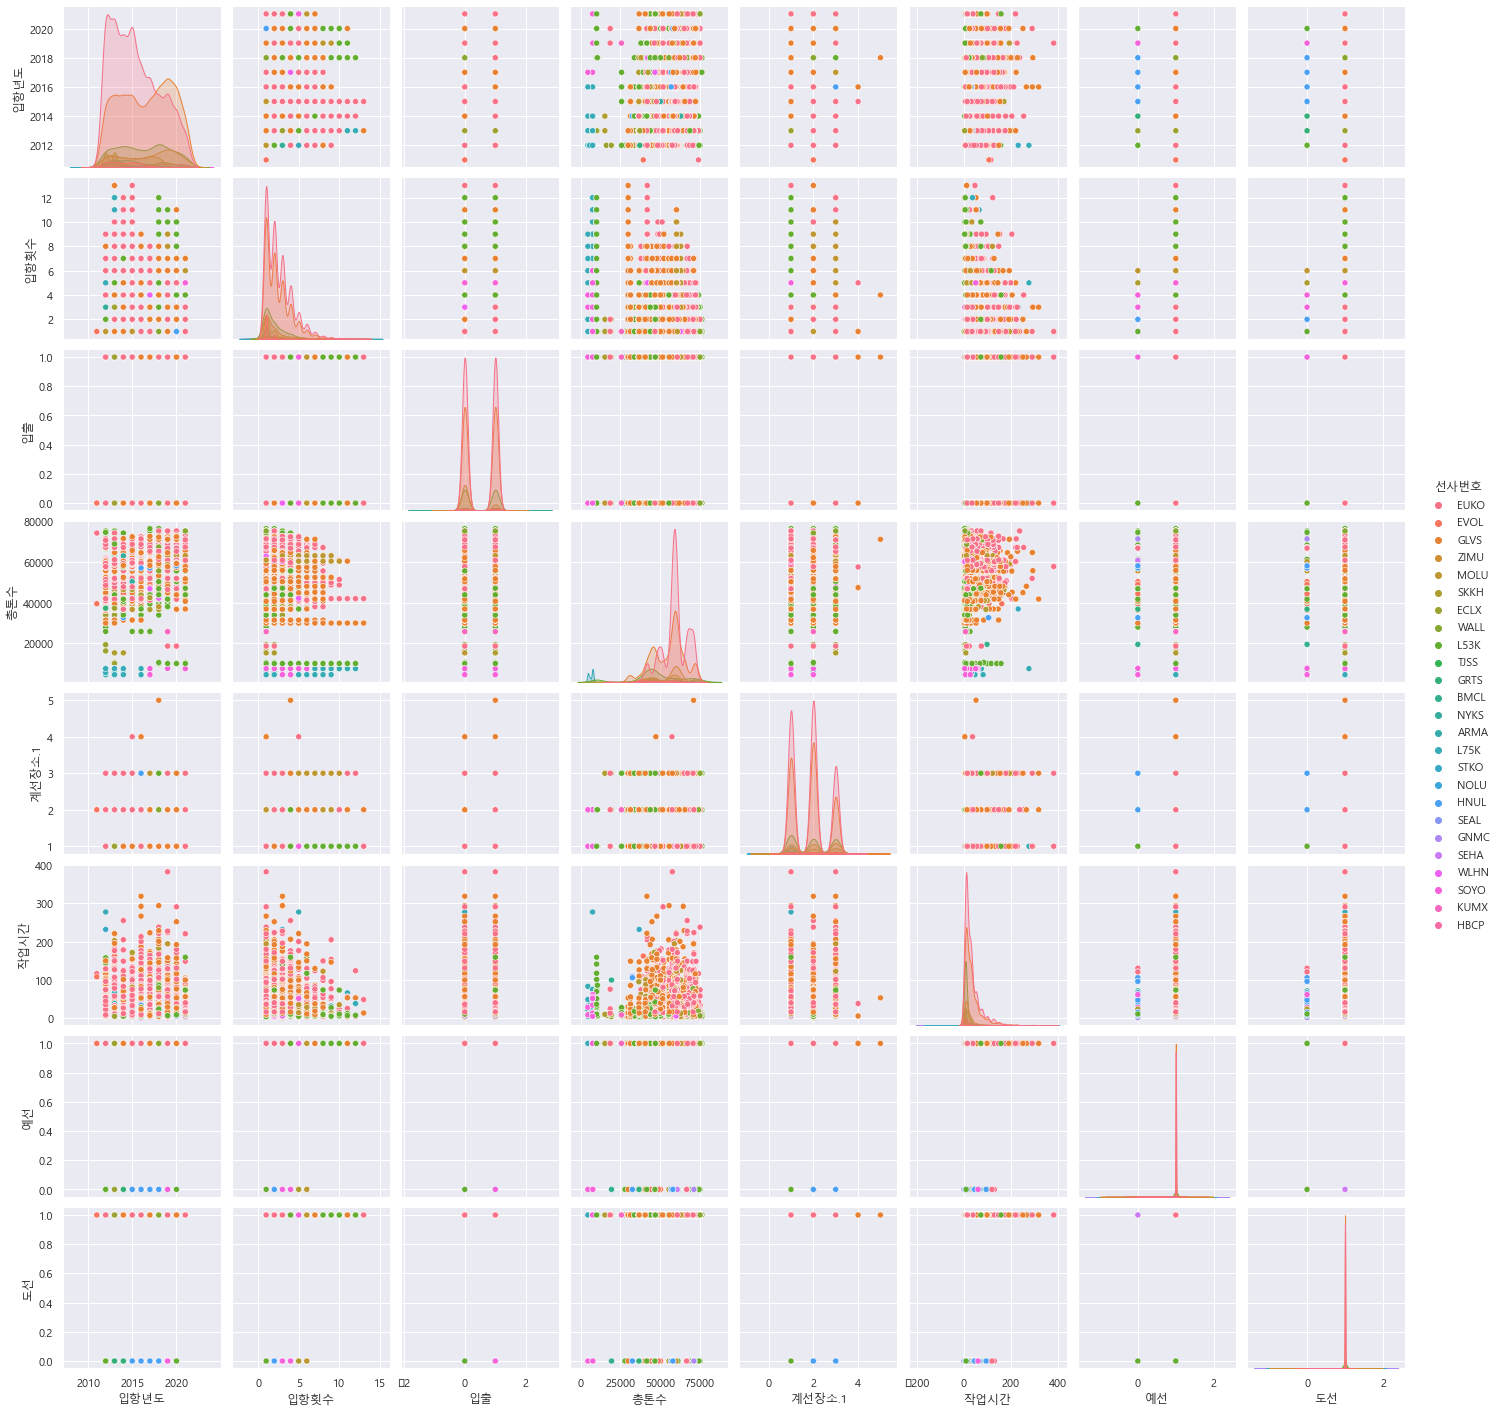

In [34]:
sns.pairplot(df, hue = '선사번호')

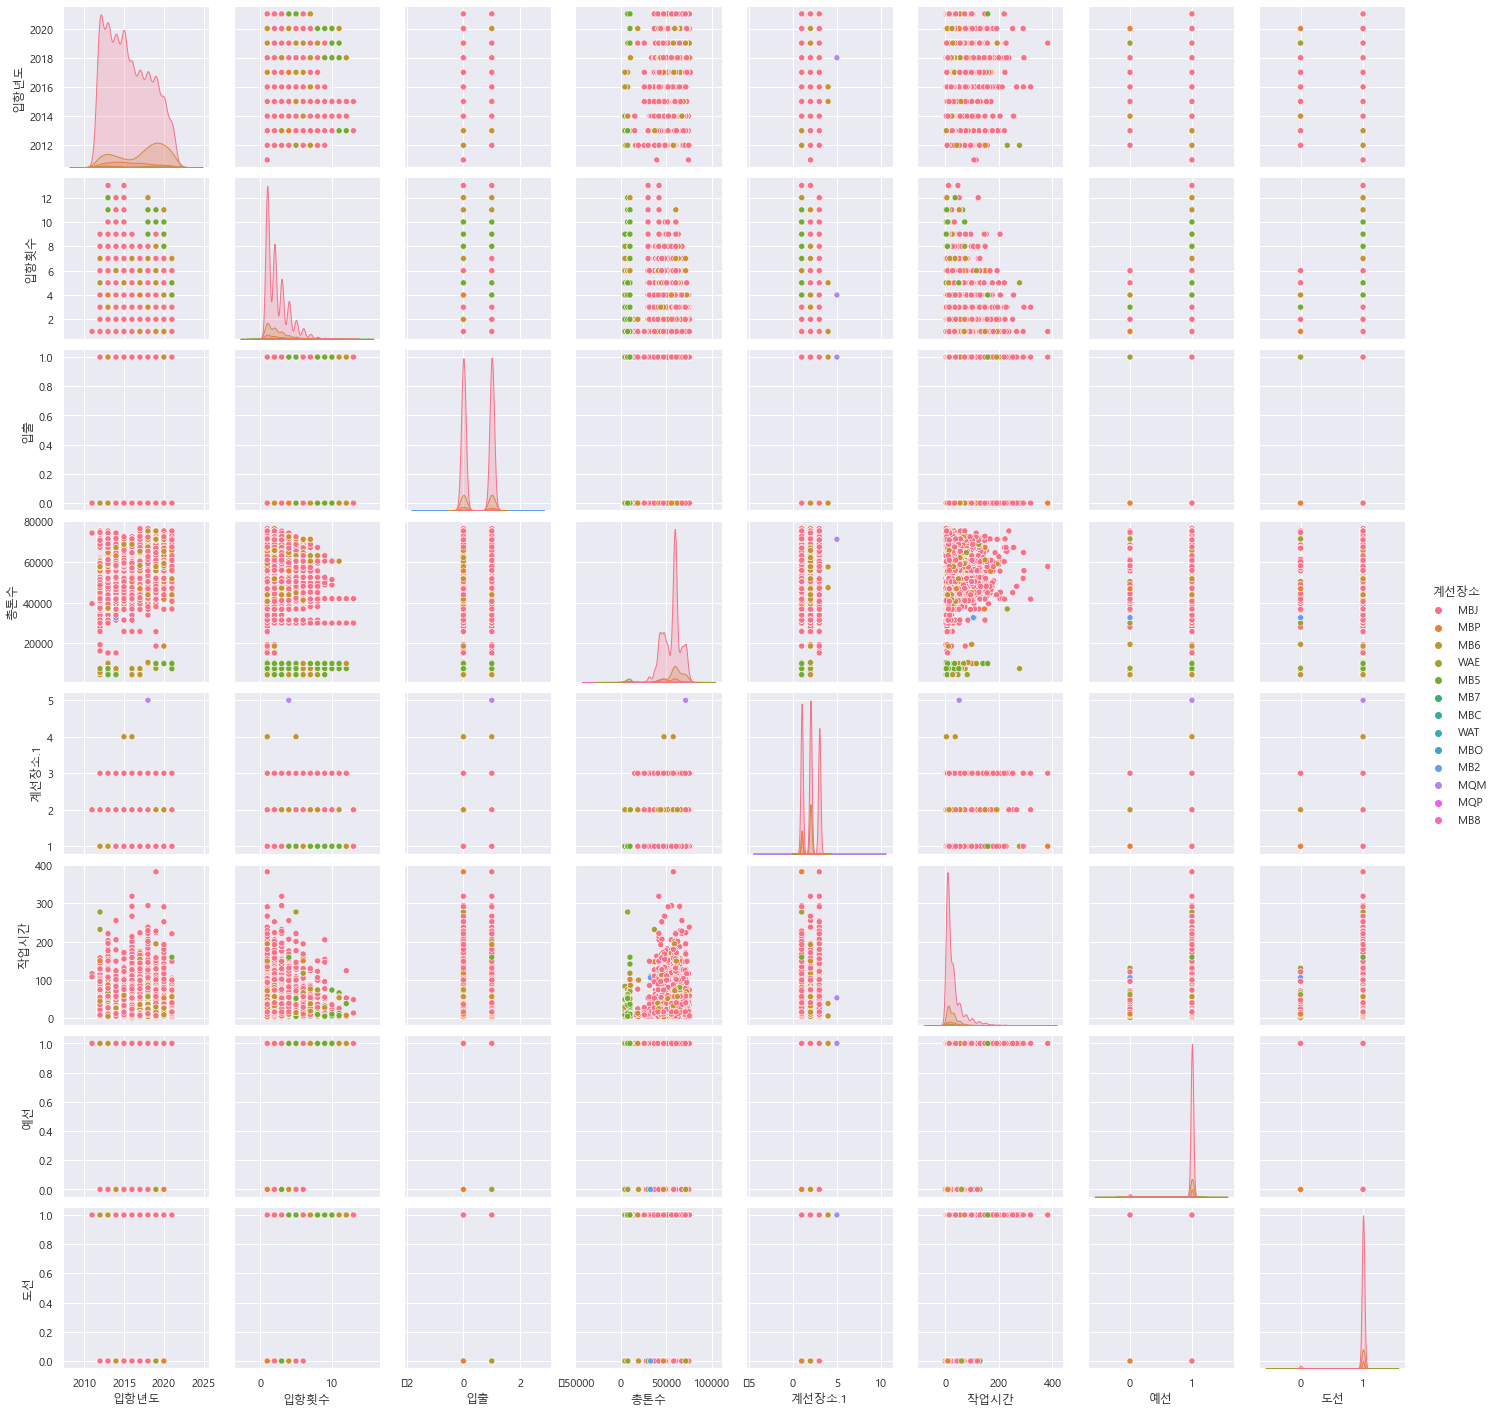

In [35]:
sns.pairplot(df, hue = '계선장소')

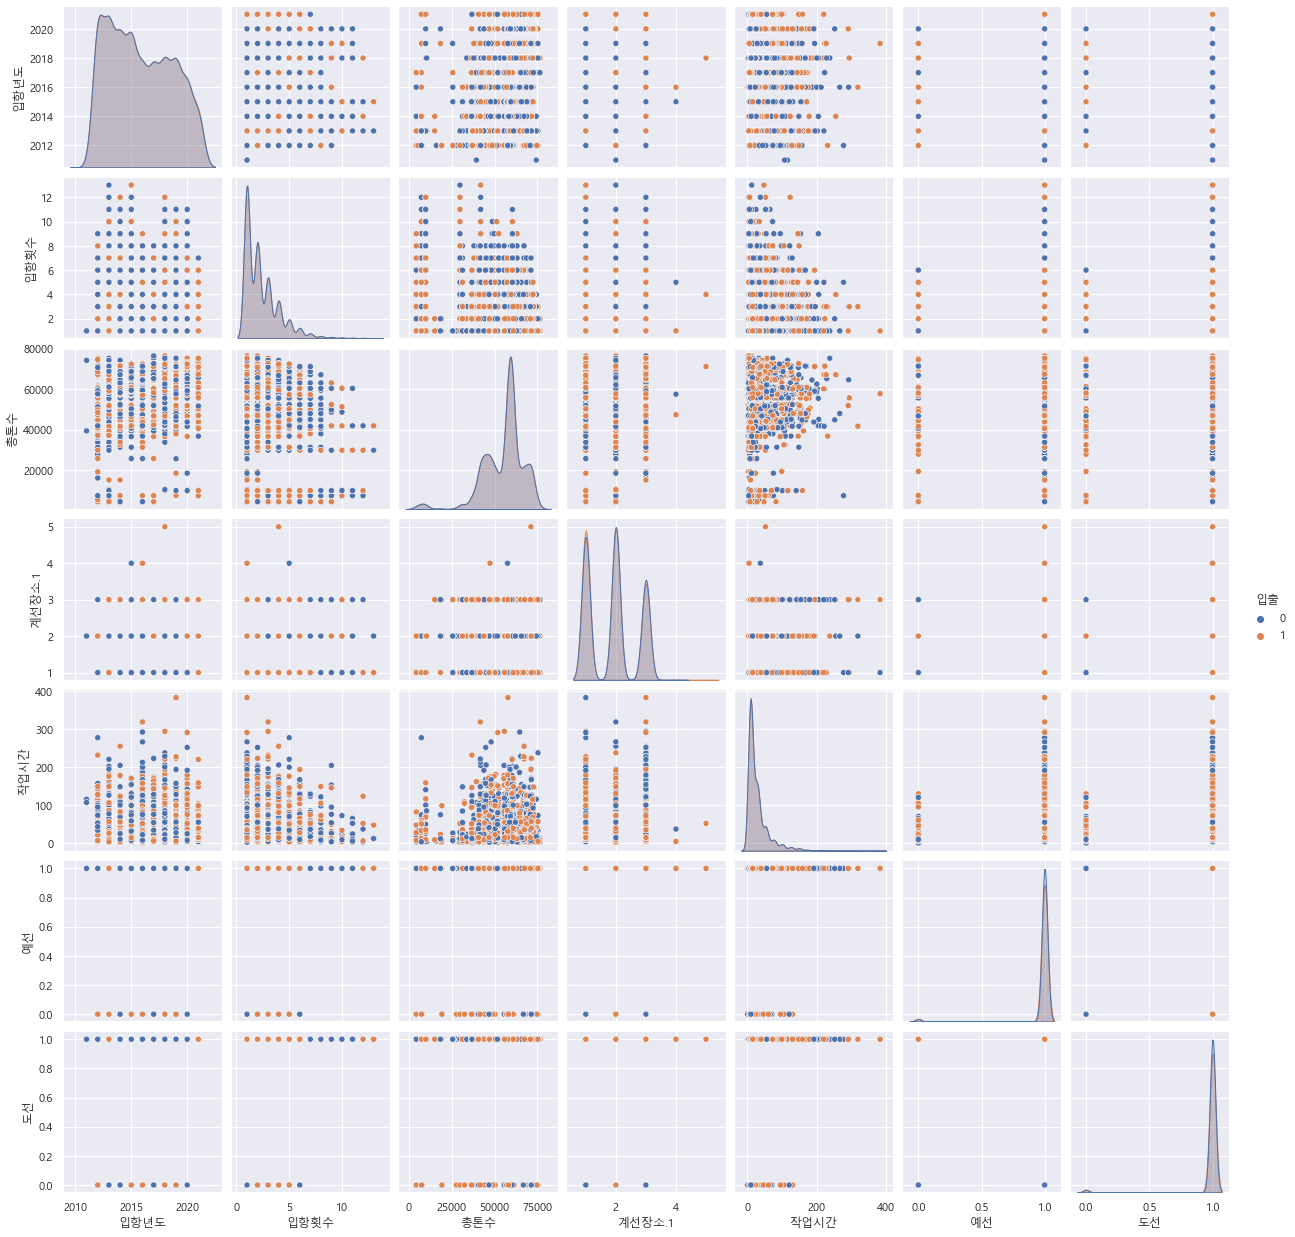

In [36]:
sns.pairplot(df, hue = '입출')

In [ ]:
sns.pairplot(df, hue = '입항횟수')

In [ ]:
sns.pairplot(df, hue = '총톤수')

In [38]:
facet = sns.FacetGrid(data=df, col='계선장소', row = '총톤수')
facet.map(sns.countplot, '입출항 차 (시간)')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000256DF154AF0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
p = sns.boxplot('작업시간(시간)',data = data_car) : 멋진 박스플롯
p = sns.boxplot('작업시간(시간)',data = data_car) : 그냥 박스플롯
p = sns.barplot(x='계선장소', y='작업시간(시간)',data = data_car) : bar플롯
sns.displot(
    data_car, x="작업시간(시간)", col="차항지", row="계선장소",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True)) : 여러변수 한꺼번에 barplot
p = sns.lineplot(x='승무원 1', y='작업시간(시간)',data = data_car) : line플롯